In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

## Making an over-fitted decision tree 

In [3]:
#splitting into dept and indp features

X, y = load_breast_cancer(return_X_y = True) 

#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#fitting into decision tree

dt = DecisionTreeClassifier(random_state=0) #since we have not defined any max_depth, aur leaf sample values hence this tree will have an overfitting problem
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [6]:
pred = dt.predict(X_test)

#calculating accuracy

from sklearn.metrics import accuracy_score

print('The accuracy is {}'.format(accuracy_score(y_test,pred)))

The accuracy is 0.8811188811188811


[Text(0.5595238095238095, 0.9444444444444444, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.35714285714285715, 0.8333333333333334, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.23809523809523808, 0.7222222222222222, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.14285714285714285, 0.6111111111111112, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.09523809523809523, 0.5, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(0.14285714285714285, 0.3888888888888889, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.2777777777777778, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.14285714285714285, 0.166666666666

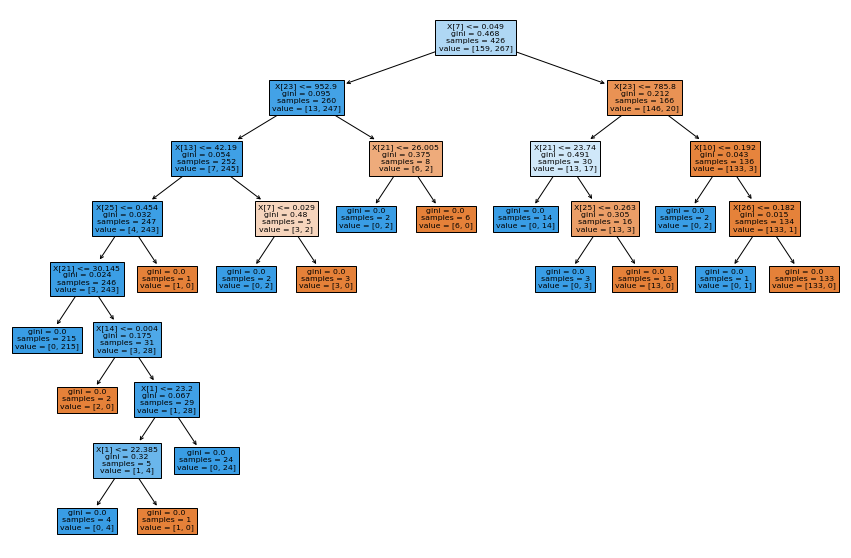

In [8]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

## Making a cost complexity decision tree

In [13]:
#cost complexity pruning path to determine till what depth we have to construct our decision tree

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas #list of alpha values

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [15]:
#alpha_values are passed to decision tree to determine the weak point of leaf node to return the maximum depth of a leaf node made.
#Iterating through every alpha value to check value of last node

dtc = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    dt.fit(X_train, y_train)
    dtc.append(dt)

print('Number of nodes in the last tree is {} with alpha value {}'.format(dtc[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is 1 with alpha value 0.3272984419327777


In this example we removed the last elements in clfs and ccp_alphas because it is the trivial tree with only one node, As the depth decreases the alpha value also increases

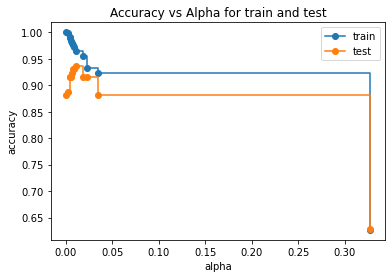

In [20]:
#calculating train and test scores 

train_score = [dt.score(X_train, y_train) for dt in dtc]  # looping through all the classifier values that were created with alpha values and that are present in our dtc list

test_score =  [dt.score(X_test,y_test) for dt in dtc]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for train and test')

ax.plot(ccp_alphas, train_score, marker = 'o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, marker = 'o', label='test',drawstyle='steps-post')

ax.legend()

for our scenario i have taken alpha value 0.03

In [21]:
#now again constructing our decision tree

dt = DecisionTreeClassifier(random_state=0, ccp_alpha = 0.03)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.03, random_state=0)

In [22]:
pred = dt.predict(X_test)

#calculating accuracy

print('The accuracy is {}'.format(accuracy_score(y_test,pred)))

The accuracy is 0.916083916083916


[Text(0.4, 0.8333333333333334, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.2, 0.5, 'gini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.6, 0.5, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

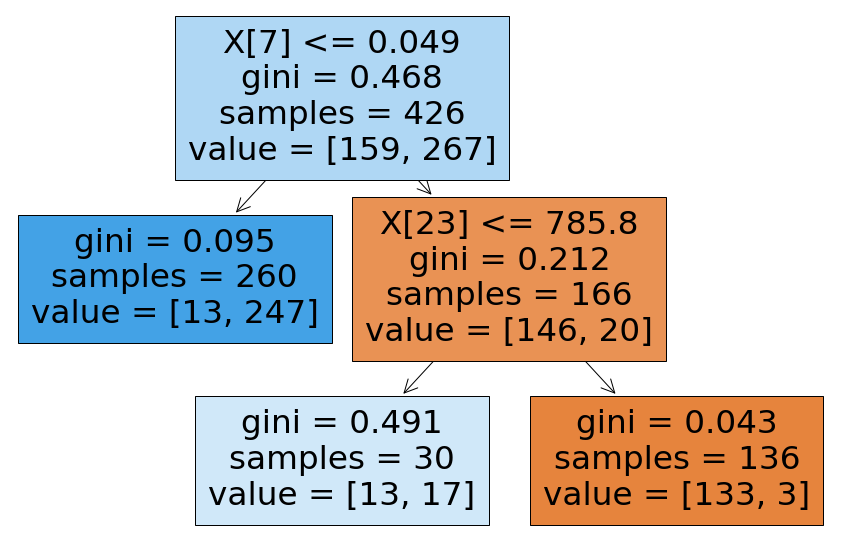

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

Now our depth has been pruned by the alpha value 